In [ ]:
import matplotlib.pyplot as plt 
#plt.style.use('ggplot')
#%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
data = pd.read_csv("food_truck_data.txt")
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### *Visualización de datos*

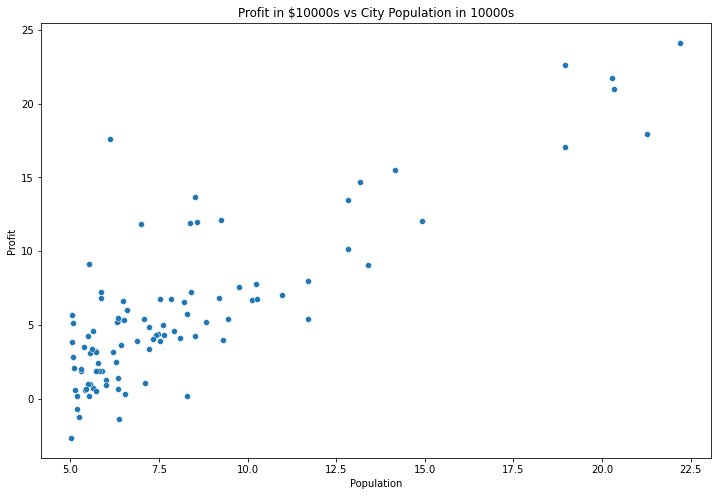

In [ ]:
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title("Profit in $10000s vs City Population in 10000s");

### *Función costo*
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    
    return 1 / (2 * m) * np.sum(error)

In [ ]:
m = data.Population.values.size
print(m)

97


In [ ]:
# add another dimension to accomodate the intercept term and set it to all ones
import numpy as np
X = np.append(np.ones((m,1)),data.Population.values.reshape(m,1),axis=1)
print(X)

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

In [ ]:
y = data.Profit.values.reshape(m, 1)
print(y)

[[17.592  ]
 [ 9.1302 ]
 [13.662  ]
 [11.854  ]
 [ 6.8233 ]
 [11.886  ]
 [ 4.3483 ]
 [12.     ]
 [ 6.5987 ]
 [ 3.8166 ]
 [ 3.2522 ]
 [15.505  ]
 [ 3.1551 ]
 [ 7.2258 ]
 [ 0.71618]
 [ 3.5129 ]
 [ 5.3048 ]
 [ 0.56077]
 [ 3.6518 ]
 [ 5.3893 ]
 [ 3.1386 ]
 [21.767  ]
 [ 4.263  ]
 [ 5.1875 ]
 [ 3.0825 ]
 [22.638  ]
 [13.501  ]
 [ 7.0467 ]
 [14.692  ]
 [24.147  ]
 [-1.22   ]
 [ 5.9966 ]
 [12.134  ]
 [ 1.8495 ]
 [ 6.5426 ]
 [ 4.5623 ]
 [ 4.1164 ]
 [ 3.3928 ]
 [10.117  ]
 [ 5.4974 ]
 [ 0.55657]
 [ 3.9115 ]
 [ 5.3854 ]
 [ 2.4406 ]
 [ 6.7318 ]
 [ 1.0463 ]
 [ 5.1337 ]
 [ 1.844  ]
 [ 8.0043 ]
 [ 1.0179 ]
 [ 6.7504 ]
 [ 1.8396 ]
 [ 4.2885 ]
 [ 4.9981 ]
 [ 1.4233 ]
 [-1.4211 ]
 [ 2.4756 ]
 [ 4.6042 ]
 [ 3.9624 ]
 [ 5.4141 ]
 [ 5.1694 ]
 [-0.74279]
 [17.929  ]
 [12.054  ]
 [17.054  ]
 [ 4.8852 ]
 [ 5.7442 ]
 [ 7.7754 ]
 [ 1.0173 ]
 [20.992  ]
 [ 6.6799 ]
 [ 4.0259 ]
 [ 1.2784 ]
 [ 3.3411 ]
 [-2.6807 ]
 [ 0.29678]
 [ 3.8845 ]
 [ 5.7014 ]
 [ 6.7526 ]
 [ 2.0576 ]
 [ 0.47953]
 [ 0.20421]
 [ 0.67861]
 [ 7

In [ ]:
theta = np.zeros((2,1))
print(theta)

[[0.]
 [0.]]


In [ ]:
cost_function(X, y, theta)

32.072733877455676

### *Gradient descent*

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations): 
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
        
    return theta, costs

In [ ]:
print(theta)

[[0.]
 [0.]]


In [ ]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=1000)
print("h(x) = {} + {}x1".format(str(round(theta[0,0], 2)),
                                str(round(theta[1,0], 2))))

h(x) = -3.24 + 1.13x1


In [ ]:
costs[999]

4.515955503078912

### *Visualising the Cost Function* $J(\theta)$
---

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)
print(t,"\n")
print(cost_values)

[10.  4.] 

[[30109.79230976 29087.89994594 28086.14884947 ... 24763.97382239
  25695.78439198 26647.73622891]
 [29641.48953801 28627.67288686 27633.99750308 ... 25079.01518083
  26018.90146309 26978.92901271]
 [29177.14554596 28171.4046075  27185.8049364  ... 25398.01531897
  26345.97731392 27314.08057622]
 ...
 [ 3116.50180859  2877.95357496  2659.54660868 ... 73755.06394973
  75470.2186495  77205.51461663]
 [ 3032.20066932  2801.72814837  2591.39689477 ... 74454.10694065
  76177.3373531  77920.70903291]
 [ 2951.85830976  2729.4615015   2527.20596058 ... 75157.10871128
  76888.41483642 78639.86222891]]


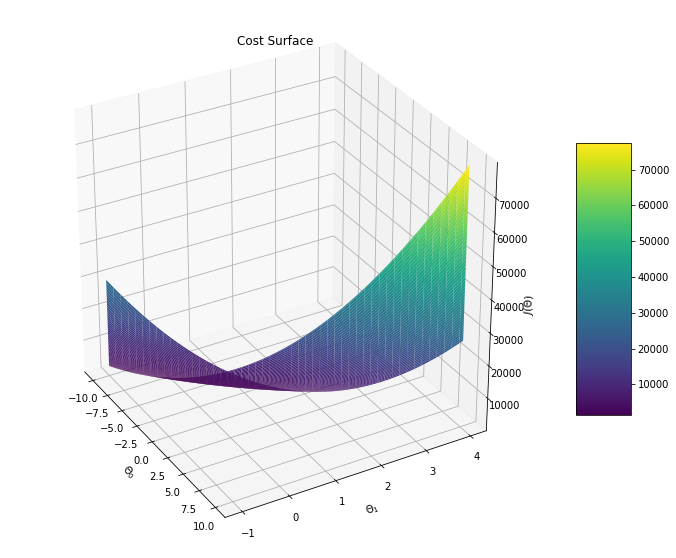

In [ ]:
fig = plt.figure(figsize = (12, 10))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = "viridis", linewidth = 0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.set_title("Cost Surface")
ax.view_init(30,330)

plt.show()

### *Plotting the Convergence*
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

In [ ]:
print(np.shape(costs))

(1000,)


In [ ]:
print(costs)

[6.737190464870006, 5.931593568604956, 5.901154707081388, 5.895228586444221, 5.89009494311733, 5.885004158443647, 5.879932480491418, 5.874879094762575, 5.869843911806386, 5.86482686531293, 5.859827889932181, 5.85484692057229, 5.849883892376588, 5.844938740722034, 5.840011401218361, 5.8351018097072265, 5.830209902261388, 5.825335615183863, 5.820478885007099, 5.815639648492154, 5.810817842627869, 5.806013404630044, 5.801226271940628, 5.796456382226898, 5.791703673380653, 5.786968083517396, 5.782249550975539, 5.777548014315596, 5.7728634123193805, 5.768195683989212, 5.76354476854712, 5.758910605434048, 5.754293134309077, 5.749692295048628, 5.745108027745684, 5.740540272709014, 5.735988970462381, 5.731454061743792, 5.726935487504702, 5.722433188909257, 5.717947107333528, 5.713477184364749, 5.709023361800549, 5.704585581648198, 5.700163786123856, 5.695757917651815, 5.691367918863752, 5.68699373259798, 5.682635301898707, 5.678292570015292, 5.673965480401506, 5.669653976714798, 5.665358002815

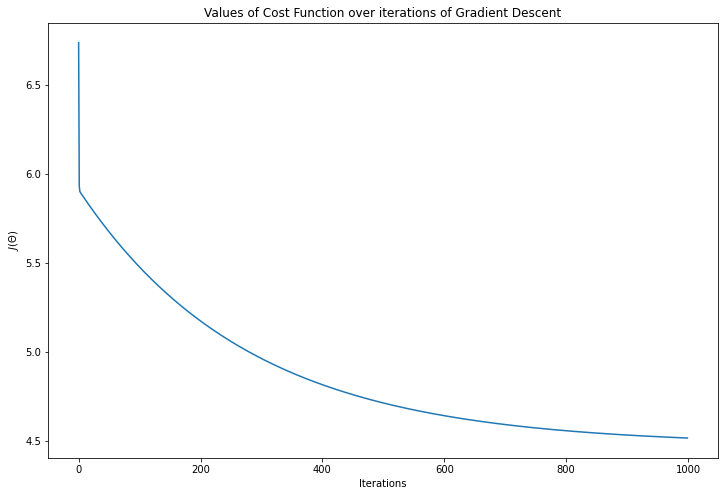

In [ ]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

### *Training Data*
---

In [ ]:
theta.shape

(2, 1)

In [ ]:
theta

array([[-3.24140214],
       [ 1.1272942 ]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


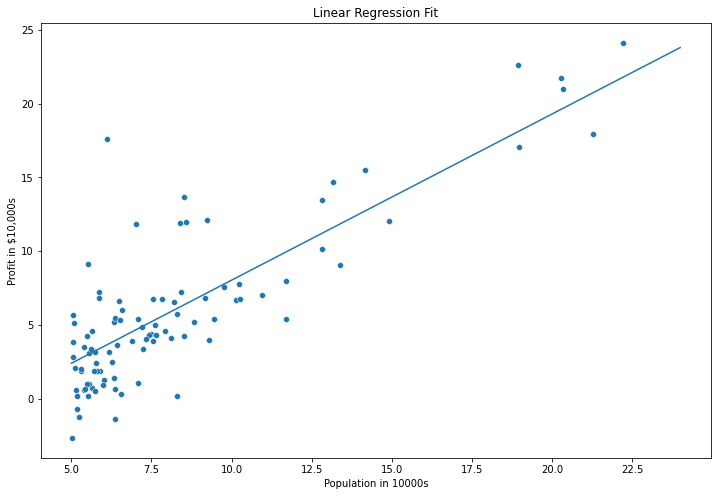

In [ ]:
theta = np.squeeze(theta)
sns.scatterplot(x = "Population", y= "Profit", data = data)

x_value=[x for x in range(5, 25)]
y_value=[(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit");

In [ ]:
x_value=[x for x in range(5, 25)]
print(x_value)


[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


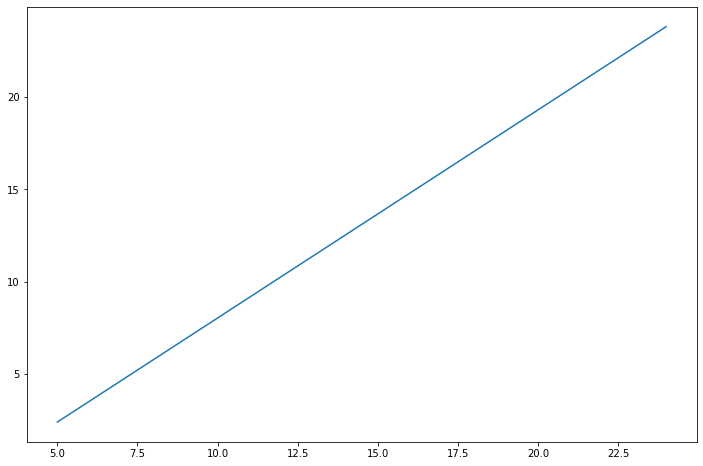

In [ ]:
y_value=[(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)

### Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [ ]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [ ]:
y_pred_1 = predict(np.array([1, 4]),theta) * 10000
print("For a population of 40,000, the model predicts a profit of $" + str(round(y_pred_1, 0)))

For a population of 40,000, the model predicts a profit of $12678.0


In [ ]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print("For a population of 83,000, the model predicts a profit of $"+str(round(y_pred_2, 0)))

For a population of 83,000, the model predicts a profit of $61151.0
